In [14]:
# Cell A — Imports & paths

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Paths
DATA_DIR = "../data/dataset_split"
IMG_SIZE = (224, 224)   # size to resize images
BATCH_SIZE = 32


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

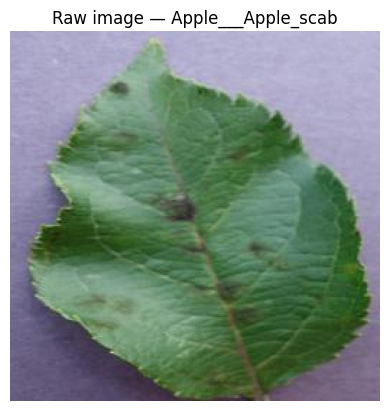

In [4]:
# Cell B — Show sample image before preprocessing

sample_class = os.listdir(os.path.join(DATA_DIR, "train"))[0]
sample_path = os.path.join(DATA_DIR, "train", sample_class)
sample_img = os.listdir(sample_path)[0]

img = Image.open(os.path.join(sample_path, sample_img))
plt.imshow(img)
plt.title(f"Raw image — {sample_class}")
plt.axis("off")


In [5]:
# Cell C — Resize function

def preprocess_image(path):
    img = Image.open(path).convert("RGB")
    img = img.resize(IMG_SIZE)
    return np.array(img) / 255.0   # normalize


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

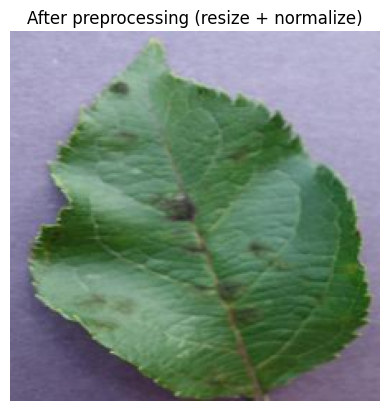

In [6]:
# Cell D — Test preprocessing

processed = preprocess_image(os.path.join(sample_path, sample_img))

plt.imshow(processed)
plt.title("After preprocessing (resize + normalize)")
plt.axis("off")


In [7]:
# Cell E — Data augmentation

train_aug = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255
)

val_aug = ImageDataGenerator(rescale=1./255)


In [12]:
# Cell F — Load dataset with augmentation

train_gen = train_aug.flow_from_directory(
    DATA_DIR + "/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = val_aug.flow_from_directory(
    DATA_DIR + "/val",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = val_aug.flow_from_directory(
    DATA_DIR + "/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 12383 images belonging to 14 classes.
Found 4361 images belonging to 14 classes.
Found 4372 images belonging to 14 classes.


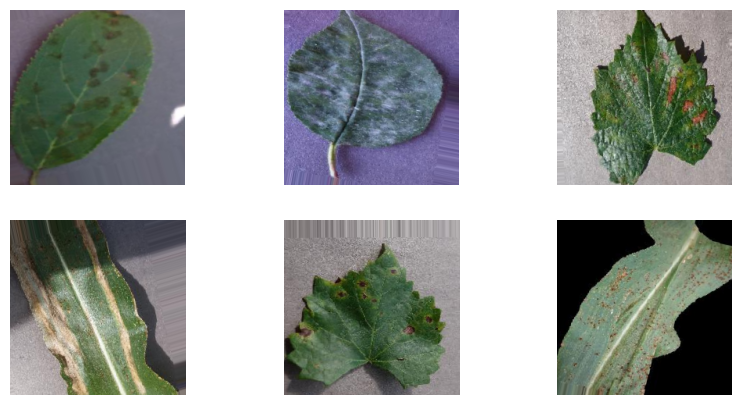

In [16]:
# Cell G — Check one batch

images, labels = next(train_gen)

plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.show()
